In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [8]:
csv_test_path = './keypoint_test.csv'
model_save="./model.hdf5"
model=load_model(model_save)
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
X_dataset = np.loadtxt('./keypoint_test.csv', delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt('./keypoint_test.csv', delimiter=',', dtype='int32', usecols=(0))
i=0
for l in range(2800):
    a = np.expand_dims(X_dataset[l], axis=0)
    predition = model.predict(a)
    class_model=elements[np.argmax(predition)]
    if class_model == y_dataset[l]:
        i+=1
print("accuratezza: ", i/2800)


1/1 [==============================] - 0s 14ms/step
accuratezza:  0.7614285714285715


In [3]:
gruppi = {}

# Iterazione attraverso gli elementi di y_dataset
for indice, valore in enumerate(y_dataset):
    # Se il valore non è ancora presente come chiave nel dizionario, viene creato un nuovo gruppo
    if valore not in gruppi:
        gruppi[valore] = []
    # Aggiunta dell'elemento corrispondente di X_dataset al gruppo corretto
    gruppi[valore].append(X_dataset[indice])

# Conversione dei gruppi in array numpy
for chiave in gruppi:
    gruppi[chiave] = np.array(gruppi[chiave])

# Stampa dei gruppi
for chiave, valore in gruppi.items():
    print("Gruppo", chiave)
    print(valore)
    print()

Gruppo 1
[[ 0.          0.          0.16167665 ... -0.75449103  0.02994012
  -0.84431136]
 [ 0.          0.          0.1626506  ... -0.75301206  0.04819277
  -0.8433735 ]
 [ 0.          0.          0.16766468 ... -0.75449103  0.04191617
  -0.84431136]
 ...
 [ 0.          0.          0.16312057 ... -0.70212764 -0.07092199
  -0.78723407]
 [ 0.          0.          0.16428572 ... -0.70714283 -0.08571429
  -0.78571427]
 [ 0.          0.          0.16312057 ... -0.70212764 -0.09929078
  -0.78723407]]

Gruppo 2
[[ 0.          0.          0.3529412  ... -0.9607843   0.5980392
  -1.        ]
 [ 0.          0.          0.38297874 ... -0.9680851   0.69148934
  -0.9680851 ]
 [ 0.          0.          0.39361703 ... -0.9468085   0.71276593
  -0.9680851 ]
 ...
 [ 0.          0.          0.34375    ... -0.734375    0.8671875
  -0.71875   ]
 [ 0.          0.          0.27722773 ... -0.8712871   0.5346535
  -0.84158415]
 [ 0.          0.          0.3030303  ... -0.969697    0.5151515
  -1.        ]]



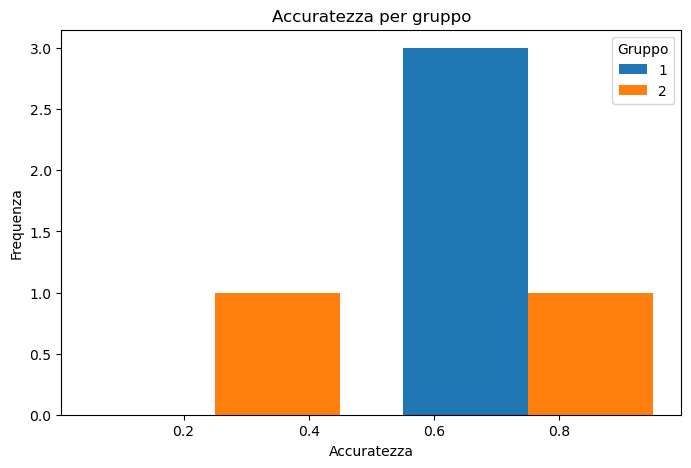

In [4]:
# Dati di esempio
X_dataset = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y_dataset = np.array([1, 1, 2, 2, 1])
predictions = np.array([1, 1, 2, 1, 1])  # Previsioni del modello per X_dataset

# Creazione di un dizionario vuoto per raggruppare le accuratezze
accuratezze_gruppi = {}

# Calcolo delle accuratezze per ogni gruppo
for indice, valore in enumerate(y_dataset):
    if valore not in accuratezze_gruppi:
        accuratezze_gruppi[valore] = []
    # Calcolo dell'accuratezza per il campione corrispondente
    accuratezza = 1 if predictions[indice] == valore else 0
    accuratezze_gruppi[valore].append(accuratezza)

# Creazione dell'istogramma
plt.figure(figsize=(8, 5))

gruppi = list(accuratezze_gruppi.keys())
accuratezze = [accuratezze_gruppi[gruppo] for gruppo in gruppi]

plt.hist(accuratezze, bins=len(gruppi), label=gruppi)
plt.xlabel('Accuratezza')
plt.ylabel('Frequenza')
plt.legend(title='Gruppo')
plt.title("Accuratezza per gruppo")

plt.show()